## Project 1: Credit Card Fraud
This dataset consists of credit card transactions in the western United States. It includes information about each transaction including customer details, the merchant and category of purchase, and whether or not the transaction was a fraud.

## Data Dictionary

| transdatetrans_time | Transaction DateTime                        |
|---------------------|---------------------------------------------|
| merchant            | Merchant Name                               |
| category            | Category of Merchant                        |
| amt                 | Amount of Transaction                       |
| city                | City of Credit Card Holder                  |
| state               | State of Credit Card Holder                 |
| lat                 | Latitude Location of Purchase               |
| long                | Longitude Location of Purchase              |
| city_pop            | Credit Card Holder's City Population        |
| job                 | Job of Credit Card Holder                   |
| dob                 | Date of Birth of Credit Card Holder         |
| trans_num           | Transaction Number                          |
| merch_lat           | Latitude Location of Merchant               |
| merch_long          | Longitude Location of Merchant              |
| is_fraud            | Whether Transaction is Fraud (1) or Not (0) |

[Source](https://www.kaggle.com/kartik2112/fraud-detection?select=fraudTrain.csv) of dataset. The data was partially cleaned and adapted by DataCamp.

 ### Import Libraries and Load Data

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import hvplot.pandas
import requests
import json

# Import API key
from api_keys import geoapify_key

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [17]:
# Load the CSV file into a Pandas DataFrame
data = pd.read_csv("credit_card_fraud.csv")


### Data Cleaning

In [18]:
# Check for empty values and columns data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  339607 non-null  object 
 1   merchant               339607 non-null  object 
 2   category               339607 non-null  object 
 3   amt                    339607 non-null  float64
 4   city                   339607 non-null  object 
 5   state                  339607 non-null  object 
 6   lat                    339607 non-null  float64
 7   long                   339607 non-null  float64
 8   city_pop               339607 non-null  int64  
 9   job                    339607 non-null  object 
 10  dob                    339607 non-null  object 
 11  trans_num              339607 non-null  object 
 12  merch_lat              339607 non-null  float64
 13  merch_long             339607 non-null  float64
 14  is_fraud               339607 non-nu

In [19]:
# Check for missing or NaN values
data.isnull().values.any()

False

In [20]:
# Check for duplicates
duplicate_trans_num = data[data.duplicated('trans_num')]
duplicate_trans_num

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud


**Discussion about the data cleaning:** The credit card transaction data looks clean because there is not any empty cells
    or missing values. Columns data type looks as expected for numerical and string values. As expected, transaction number
    is unique for every transaction.The data is clean and ready for further analysis. 

### Data Analysis and Visualizations

### Step 4: Focus on merch_lat and merch_long columns to add merch_city and merch_state columns for data analytics

In [21]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
merch_df = data.copy()
# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
merch_df.insert(15, 'merch_city', '')
merch_df.insert(16, 'merch_state_or_country', '')

# Display sample data
merch_df

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,merch_city,merch_state_or_country
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,,
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,,
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0,,
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0,,
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339602,2020-12-31 23:57:56,Schmidt-Larkin,home,12.68,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-11-09,a8310343c189e4a5b6316050d2d6b014,65.623593,-165.186033,0,,
339603,2020-12-31 23:58:04,"Pouros, Walker and Spence",kids_pets,13.02,Greenview,CA,41.5403,-122.9366,308,Call centre manager,1958-09-20,bd7071fd5c9510a5594ee196368ac80e,41.973127,-123.553032,0,,
339604,2020-12-31 23:59:07,Reilly and Sons,health_fitness,43.77,Luray,MO,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,39.946837,-91.333331,0,,
339605,2020-12-31 23:59:15,Rau-Robel,kids_pets,86.88,Burbank,WA,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,46.658340,-119.715054,0,,


In [ ]:
# Set variable to count No data found
no_merch_city_found = 0
no_merch_country_found = 0
index = 0
set_count = 1
record_count = 0

# Print a message to follow up the search
print("Starting merchant city and state or country search")

# Iterate through the merch_df DataFrame
for index, row in merch_df.iterrows():
     # Group cities in sets of 50 for logging purposes
    if (index % 1000 == 0 and index >= 1000):
        set_count += 1
        record_count = 0
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s" % (record_count, set_count))

    # Add 1 to the record count
    record_count += 1

    # Set the merchant city's latitude and longitude
    latitude = merch_df.loc[index, 'merch_lat']
    longitude = merch_df.loc[index, 'merch_long']

    # Set base URL using Reverse Geocoding API that converts lat/long coordinates to a location address
    base_url = "https://api.geoapify.com/v1/geocode/reverse?"

    # Create end point URL
    request_url = f"{base_url}lat={latitude}&lon={longitude}&type=city&apiKey={geoapify_key}"

    # Make and API request
    merch_city_data = requests.get(request_url)

    # Convert the API response to JSON format
    merch_city_data = merch_city_data.json()  
    # Print the json (pretty printed)
    #print(json.dumps(merch_city_data, indent=4, sort_keys=True))
    
    # Grab the city and State or County name and store it in the merch_df DataFrame
    try:
        merch_df.loc[index, "merch_city"] = merch_city_data["features"][0]["properties"]["county"]
        merch_country = merch_city_data["features"][0]["properties"]["country"]
        if merch_country == "United States":
            merch_df.loc[index, "merch_state_or_country"] = merch_city_data["features"][0]["properties"]["state_code"]
        else:
            merch_df.loc[index, "merch_state_or_country"] = merch_city_data["features"][0]["properties"]["county"]
        
        
    except (KeyError, IndexError):
        # If no city or state are found, set the row name as "No city or country found".
        merch_df.loc[index, "merch_city"] = "No city name found"
        merch_df.loc[index, "merch_state_or_country"] = "No country name is found"
        no_merch_city_found += 1
        no_merch_country_found += 1
        pass
        
# Log the search results
print(f"No merchant city name found is {no_merch_city_found}")
print(f"No merchant country name found is {no_merch_country_found}")
# ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by 
# the remote host', None, 10054, None)) after 10470 then after 719
# No merchant city name found is 594

# Display sample data
merch_df


**Discussion about using Reverse Geocoding API that converts lat/long coordinates to a location address:** During the first call to the Reverse Geocoding API I was 
able to successuflly complete 10470 calls before Connection Error msg shown below: <br> 
**ConnectionError:** ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None)) <br>
The second time the same error occured after 719 calls. However those 719 rows were not added to the csv output file.<br>
### Thus, only 10470 rows with 594 rows of missing location will be used for further data annalysis.<br>
**Key Learnings:** <br>
    - Need to sellect the subsect of the data to make < 10,000 calls or obtain industry lisence from Reverse Geocoding API<br>
    - API calls take a long time: It took 8 hr to complete 10470 calls

In [ ]:
# Export the merch_df into a csv
# merch_df.to_csv("output_data/credit_card_fraud_with_merch_loc.csv") 
# Note: this cell is commented out to accedintly not to overwrite an output file


In [2]:
# Read saved data
merch_data_df = pd.read_csv("output_data/credit_card_fraud_with_merch_loc.csv")

# Display sample data
merch_loc_df = merch_data_df.loc[0:10469, ['merchant','category','amt', 'merch_city', 'merch_state_or_country',\
                                           'merch_lat', 'merch_long', 'trans_num', 'is_fraud']]
merch_loc_df.tail()

,merchant,category,amt,merch_city,merch_state_or_country,merch_lat,merch_long,trans_num,is_fraud
10465,"Cole, Hills and Jewess",home,19.66,Apache County,AZ,35.926855,-108.633895,5e9d0a6e21c9542e8c6f89cc2f6ce5f7,0
10466,Christiansen-Gusikowski,misc_pos,671.79,Colfax,NM,36.301140,-104.973318,409de63c7380383b8e4159cb07a79cfc,0
10467,Gislason Group,travel,7.89,Gasconade,MO,38.268495,-91.584583,773adfb0ab1f236dd98cc62f47608635,0
10468,Hudson-Grady,shopping_pos,2.71,Perkins,NE,40.796990,-101.441473,ae8b34000624c42389de21e3c25f94b5,0
10469,"Streich, Rolfson and Wilderman",kids_pets,50.28,Solano,CA,38.425746,-122.081592,c0779d1e554c9325c50d5d79bce3241c,0


In [3]:
# Creat df with fraud only data
merch_fraud_df = merch_loc_df.loc[merch_loc_df['is_fraud'] == 1]
merch_fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 945 to 9931
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   merchant                102 non-null    object 
 1   category                102 non-null    object 
 2   amt                     102 non-null    float64
 3   merch_city              102 non-null    object 
 4   merch_state_or_country  102 non-null    object 
 5   merch_lat               102 non-null    float64
 6   merch_long              102 non-null    float64
 7   trans_num               102 non-null    object 
 8   is_fraud                102 non-null    int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 8.0+ KB


In [4]:
%%capture --no-display

# Configure the map plot
map_plot_1 = merch_fraud_df.hvplot.points(
    "merch_long",
    "merch_lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    title = "Map: Merchant Location for Fraud 102 Transactions",
    size = "amt",
    scale = 1,
    color = "merch_city",
    hover_cols=["merch_long", "merch_lat", "merch_city", "merch_state_or_country", "category","amt"]
)


# Display the map
map_plot_1

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [merch_long,merch_lat]   (merch_city,amt,merch_state_or_country,category)

**Discussion about 102 Fraud Merchant Location:** This Map shows clasters of Merchant locations that were subjected to the fraud credit card transactions.
It is only the subset of the data, so it is hard to tell if the rest of the data has the same distribution of Credi Card Fraud.

In [5]:
# Count fraud values out of 10470
fraud_total = merch_loc_df['is_fraud'].sum()
fraud_total

102

In [6]:
# Count merchant
merchant_unique_total = len(pd.unique(merch_loc_df['merchant']))
merchant_unique_total

692

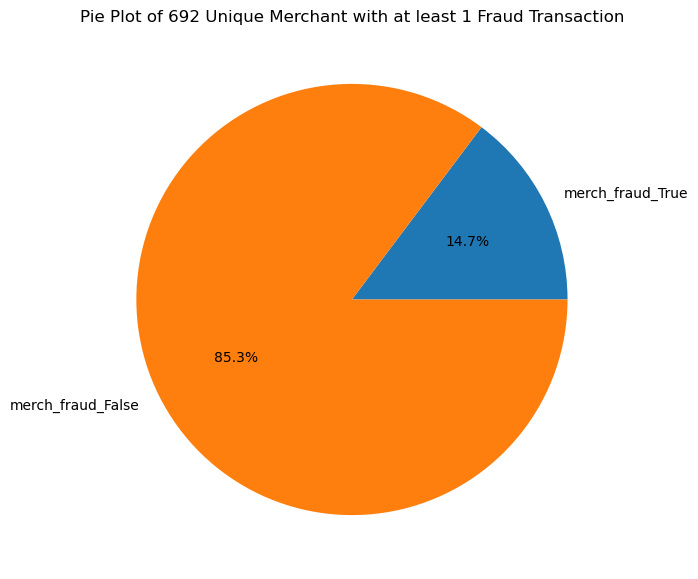

In [7]:
# Creating dataset 
merch_summary_lbls = ["merch_fraud_True", "merch_fraud_False"]
mech_summary_values = [fraud_total, merchant_unique_total - fraud_total]

# Creating plot
fig1 = plt.figure(figsize =(10, 7))
plt.pie(mech_summary_values, 
        labels = merch_summary_lbls,
        autopct='%1.1f%%')
plt.title('Pie Plot of 692 Unique Merchant with at least 1 Fraud Transaction')
 
# show plot
plt.show()

**Discussion about 692 Unique Merchant with at least 1 Fraud Transaction:** There are 692 Unique Merchant and 102 of them 
had at least 1 Fraud Transaction which is ~15% of the total. 

In [8]:
# Count merchant transaction with fraud per location
merch_with_fraud_df = merch_loc_df.query("is_fraud == 1").groupby(['merchant', 'merch_state_or_country', 'merch_city'])["trans_num"].count().reset_index(name='count_fraud')
# per_school_counts = school_data_complete["school_name"].value_counts()
merch_with_fraud_df.head()

,merchant,merch_state_or_country,merch_city,count_fraud
0,Abbott-Rogahn,MO,Camden,1
1,Ankunding-Carroll,CO,Mesa,1
2,Barrows PLC,MO,Grundy,1
3,Bartoletti and Sons,UT,Grand,1
4,Bauch-Rayno,No country name is found,No city name found,1


In [9]:
# Count merchant total transaction per location
merch_trans_count_df = merch_loc_df.groupby(['merchant', 'merch_state_or_country', 'merch_city'])["trans_num"].count().reset_index(name='count_total')
merch_trans_count_df.head()

,merchant,merch_state_or_country,merch_city,count_total
0,Abbott-Rogahn,CA,Contra Costa,1
1,Abbott-Rogahn,CA,Los Angeles County,1
2,Abbott-Rogahn,CA,Siskiyou County,1
3,Abbott-Rogahn,CO,El Paso County,1
4,Abbott-Rogahn,MO,Camden,1


In [10]:
merch_trans_count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10023 entries, 0 to 10022
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   merchant                10023 non-null  object
 1   merch_state_or_country  10023 non-null  object
 2   merch_city              10023 non-null  object
 3   count_total             10023 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 313.3+ KB


In [11]:
# Create a data frame with fraud and total count per merchant per location
merch_fraud_total_df = pd.merge(merch_with_fraud_df, merch_trans_count_df, 
                                left_on=['merchant', 'merch_state_or_country', 'merch_city'],
                               right_on=['merchant', 'merch_state_or_country', 'merch_city'])
merch_fraud_total_df.head()

,merchant,merch_state_or_country,merch_city,count_fraud,count_total
0,Abbott-Rogahn,MO,Camden,1,1
1,Ankunding-Carroll,CO,Mesa,1,1
2,Barrows PLC,MO,Grundy,1,1
3,Bartoletti and Sons,UT,Grand,1,1
4,Bauch-Rayno,No country name is found,No city name found,1,1


In [12]:
merch_fraud_total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   merchant                101 non-null    object
 1   merch_state_or_country  101 non-null    object
 2   merch_city              101 non-null    object
 3   count_fraud             101 non-null    int64 
 4   count_total             101 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.1+ KB


In [13]:
# Sort the data highest value on top
merch_fraud_total_sorted_df = merch_fraud_total_df.sort_values(by=['count_fraud', 'count_total'], ascending=False)
merch_fraud_total_sorted_df.head(25)

,merchant,merch_state_or_country,merch_city,count_fraud,count_total
66,Murray-Smitham,No country name is found,No city name found,2,4
29,Heller-Langosh,No country name is found,No city name found,1,4
77,Rau and Sons,No country name is found,No city name found,1,4
46,Koepp-Witting,No country name is found,No city name found,1,3
10,Beier-Hyatt,No country name is found,No city name found,1,2
36,Kiehn Inc,No country name is found,No city name found,1,2
39,"Kihn, Abernathy and Douglas",CA,San Diego,1,2
42,Kilback LLC,No country name is found,No city name found,1,2
68,"Nicolas, Hills and McGlynn",UT,San Juan,1,2
86,"Schoen, Kuphal and Nitzsche",CA,San Diego,1,2


In [14]:
# Calculate % fraud
merch_fraud_total_sorted_df['%_fraud'] = merch_fraud_total_sorted_df['count_fraud']/merch_fraud_total_sorted_df['count_total']*100
merch_fraud_total_sorted_df.head(15)

,merchant,merch_state_or_country,merch_city,count_fraud,count_total,%_fraud
66,Murray-Smitham,No country name is found,No city name found,2,4,50.000000
29,Heller-Langosh,No country name is found,No city name found,1,4,25.000000
77,Rau and Sons,No country name is found,No city name found,1,4,25.000000
46,Koepp-Witting,No country name is found,No city name found,1,3,33.333333
10,Beier-Hyatt,No country name is found,No city name found,1,2,50.000000
36,Kiehn Inc,No country name is found,No city name found,1,2,50.000000
39,"Kihn, Abernathy and Douglas",CA,San Diego,1,2,50.000000
42,Kilback LLC,No country name is found,No city name found,1,2,50.000000
68,"Nicolas, Hills and McGlynn",UT,San Juan,1,2,50.000000
86,"Schoen, Kuphal and Nitzsche",CA,San Diego,1,2,50.000000


In [15]:
merch_fraud_total_sorted_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 66 to 100
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   merchant                101 non-null    object 
 1   merch_state_or_country  101 non-null    object 
 2   merch_city              101 non-null    object 
 3   count_fraud             101 non-null    int64  
 4   count_total             101 non-null    int64  
 5   %_fraud                 101 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 5.5+ KB


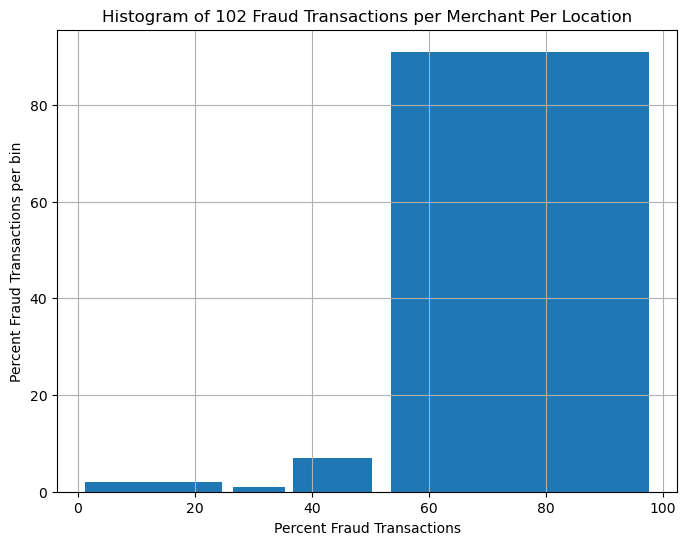

In [23]:
# creating a basic histogram 
merch_fraud_total_sorted_df.hist(column='%_fraud', figsize=[8, 6], bins=[0, 26, 36, 51, 100], rwidth=0.9) 
plt.xlabel("Percent Fraud Transactions")
plt.ylabel("Percent Fraud Transactions per bin")
plt.title('Histogram of 102 Fraud Transactions per Merchant Per Location')
# Show plot
plt.show()

**Discussion about 102 Fraud Transactions per Merchant per Location:** It was interesting to see what percent of 
total transaction per Merchant per location where a fraud. To my surprise, 92/102 fraud transactions happened one time 
per merchant per location and it was the only transation at this location. It is only the subset of the data; however, this
is an interesting trend that requeres further in depth investigation. 